In [74]:

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)
import numpy



In [104]:

all_files=['NLPdataEX7_doc1.txt','NLPdataEX7_doc2.txt','NLPdataEX7_doc3.txt','NLPdataEX7_doc4.txt','NLPdataEX7_doc5.txt','NLPdataEX7_doc6.txt','NLPdataEX7_doc7.txt','NLPdataEX7_doc8.txt']
column_names=['NLPdataEX7_doc1','NLPdataEX7_doc2','NLPdataEX7_doc3','NLPdataEX7_doc4','NLPdataEX7_doc5','NLPdataEX7_doc6','NLPdataEX7_doc7','NLPdataEX7_doc8']
words=[]
for file in all_files:
    words += open(file) 


In [105]:
#taken min_df =2 because 1 will create 336 columns of features
vectorizer = CountVectorizer(min_df = 2, stop_words = 'english')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [118]:

vectorizer = CountVectorizer(min_df = 2, stop_words = 'english')
vectorizer


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [119]:
dtm = vectorizer.fit_transform(words)

dtm

<8x21 sparse matrix of type '<class 'numpy.int64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [120]:
print(pd.DataFrame(dtm.toarray(),index=column_names,columns=vectorizer.get_feature_names()))

                 beneath  cave  comfortably  football  high  house  known  \
NLPdataEX7_doc1        0     0            0         2     2      0      0   
NLPdataEX7_doc2        0     0            0         0     0      0      0   
NLPdataEX7_doc3        0     0            0         1     1      0      0   
NLPdataEX7_doc4        2     1            1         0     0      0      0   
NLPdataEX7_doc5        2     1            1         0     0      1      1   
NLPdataEX7_doc6        0     0            0         0     0      1      1   
NLPdataEX7_doc7        0     0            0         0     0      0      1   
NLPdataEX7_doc8        0     0            0         0     0      0      0   

                 lava  let  lunar  ...    moon  players  provide  question  \
NLPdataEX7_doc1     0    0      0  ...       0        1        0         0   
NLPdataEX7_doc2     0    0      0  ...       0        0        0         0   
NLPdataEX7_doc3     0    1      0  ...       0        3        1        

In [121]:
# Get words that correspond to each column
vectorizer.get_feature_names()


['beneath',
 'cave',
 'comfortably',
 'football',
 'high',
 'house',
 'known',
 'lava',
 'let',
 'lunar',
 'make',
 'moon',
 'players',
 'provide',
 'question',
 'reason',
 'red',
 'said',
 'schools',
 'surface',
 'tubes']

In [123]:

lsa = TruncatedSVD(4, algorithm = 'randomized') 
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)


In [124]:
print(dtm_lsa)

[[ 0.00192955  0.85445069 -0.22255431 -0.46944634]
 [ 0.60024907  0.61553724  0.13476052 -0.49259981]
 [ 0.01682103  0.97535557 -0.14581576  0.16473106]
 [ 0.83368589  0.11425902  0.53851155 -0.04379517]
 [ 0.97071143 -0.05418354 -0.23368244  0.01326606]
 [ 0.26732517 -0.06883399 -0.43233991  0.85841793]
 [ 0.1737214   0.05690165  0.10265322  0.97777574]
 [ 0.058482    0.39436797  0.22736048  0.88845989]]


In [125]:
print(pd.DataFrame(lsa.components_,index = ["component_1","component_2",'component_3','component_4'],columns = vectorizer.get_feature_names()))
print(pd.DataFrame(dtm_lsa, index=column_names, columns = ["component_1","component_2",'component_3','component_4']))




              beneath      cave  comfortably  football      high     house  \
component_1  0.271773  0.135887     0.135887  0.000752  0.000752  0.086077   
component_2  0.021815  0.010907     0.010907  0.399806  0.399806 -0.023867   
component_3  0.156831  0.078415     0.078415 -0.110898 -0.110898 -0.139506   
component_4 -0.050591 -0.025295    -0.025295 -0.337606 -0.337606  0.109033   

                known      lava       let     lunar    ...         moon  \
component_1  0.087492  0.557633  0.001734  0.238961    ...     0.459197   
component_2 -0.021721 -0.098123  0.206184  0.076335    ...     0.065436   
component_3 -0.134458 -0.534738 -0.007850  0.480508    ...     0.436292   
component_4  0.238584  0.068488  0.372476 -0.113400    ...    -0.119938   

              players   provide  question    reason       red      said  \
component_1  0.001977  0.001734  0.052631  0.001734  0.052178  0.003142   
component_2  0.629951  0.206184  0.066878  0.206184  0.204733  0.000085   
componen

In [126]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
print (xs, ys) 

[0.0019295536978564947, 0.60024906594635274, 0.016821031970259571, 0.83368589181255248, 0.97071142677879318, 0.26732517093410663, 0.17372140049373574, 0.058481996594124917] [0.85445069172892107, 0.6155372352346159, 0.97535557404703155, 0.11425901619242129, -0.054183544776516712, -0.068833989751084054, 0.056901654278651612, 0.39436797205098062]


In [127]:

# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
print (pd.DataFrame(similarity,index=column_names, columns=column_names).head(10))


                 NLPdataEX7_doc1  NLPdataEX7_doc2  NLPdataEX7_doc3  \
NLPdataEX7_doc1         1.000000         0.728362         0.788545   
NLPdataEX7_doc2         0.728362         1.000000         0.509668   
NLPdataEX7_doc3         0.788545         0.509668         1.000000   
NLPdataEX7_doc4        -0.000051         0.664893         0.039729   
NLPdataEX7_doc5         0.001355         0.511291        -0.000260   
NLPdataEX7_doc6        -0.365061        -0.363027         0.141809   
NLPdataEX7_doc7        -0.432904        -0.328517         0.204523   
NLPdataEX7_doc8        -0.130603        -0.129164         0.498837   

                 NLPdataEX7_doc4  NLPdataEX7_doc5  NLPdataEX7_doc6  \
NLPdataEX7_doc1        -0.000051         0.001355        -0.365061   
NLPdataEX7_doc2         0.664893         0.511291        -0.363027   
NLPdataEX7_doc3         0.039729        -0.000260         0.141809   
NLPdataEX7_doc4         1.000000         0.676656        -0.055414   
NLPdataEX7_doc5    

In [128]:

#%pylab inline
import pylab
pylab.interactive(True)

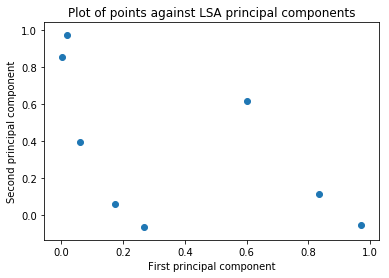

In [129]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.show(1)


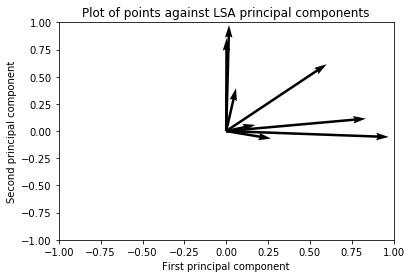

In [130]:
plt.figure(2)
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.show(2)
